# PCA demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA


In [2]:
faces = datasets.fetch_olivetti_faces()
F = faces.images[0]
print(F)

[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
 [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
 [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
 ...
 [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
 [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
 [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]


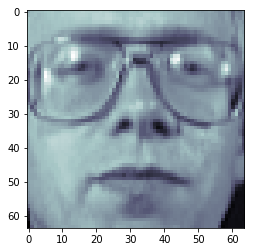

In [3]:
face_index = 11
plt.imshow(faces.images[face_index], cmap=plt.cm.bone)
plt.show()

In [4]:
n_pixels = 64
n_images = faces.images.shape[0]
X = np.zeros((n_images,n_pixels*n_pixels))
for i in range(n_images):
    X[i,:] = faces.images[i].reshape(n_pixels*n_pixels)
X.shape    

(400, 4096)

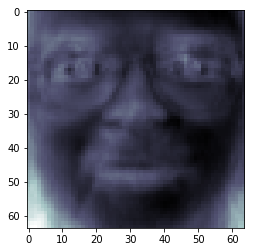

In [5]:
pca = PCA(n_components=400)
pca.fit(X)
plt.imshow(pca.components_[0].reshape(faces.images[0].shape),cmap=plt.cm.bone)
plt.show()

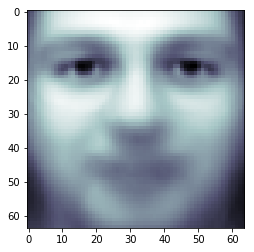

In [6]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)
plt.show()

## PCA "small data" example

In [7]:
X_small = np.array([[1,1,1],
                    [1,-1,1],
                    [-1,1,1],
                    [1,1,-1]])
print(X_small)

[[ 1  1  1]
 [ 1 -1  1]
 [-1  1  1]
 [ 1  1 -1]]


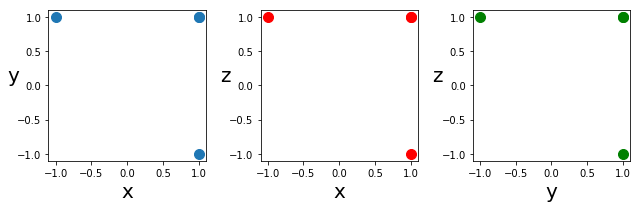

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
ms = 10
size = 20


axs[0].plot(X_small[:,0],X_small[:,1],'o',ms=ms)
axs[0].set_xlabel('x',size=size)
axs[0].set_ylabel('y',size=size,rotation=0)
axs[1].plot(X_small[:,0],X_small[:,2],'ro',ms=ms)
axs[1].set_xlabel('x',size=size)
axs[1].set_ylabel('z',size=size,rotation=0)
axs[2].plot(X_small[:,1],X_small[:,2],'go',ms=ms)
axs[2].set_xlabel('y',size=size)
axs[2].set_ylabel('z',size=size,rotation=0)

plt.tight_layout()
plt.savefig('../figs/PCA_small_data.pdf')
plt.show()

In [9]:
# do the whole PCA
pca = PCA(n_components=3)
pca.fit(X_small)

# look at the results (note that sklearn spits out
# the transpose of the e-vector matrix V)
pca.components_.T

array([[-0.        , -0.81649658,  0.57735027],
       [ 0.70710678,  0.40824829,  0.57735027],
       [-0.70710678,  0.40824829,  0.57735027]])

In [10]:
# rotate/transform the data to align with the PCs
T = pca.transform(X_small)

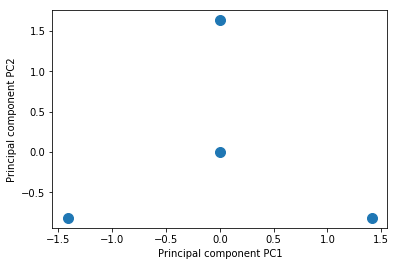

In [11]:
plt.plot(T[:,0],T[:,1],'o',ms=ms)
plt.xlabel('Principal component PC1')
plt.ylabel('Principal component PC2')
plt.show()

In [12]:
C = np.cov(X_small.T)
print(C)

[[ 1.         -0.33333333 -0.33333333]
 [-0.33333333  1.         -0.33333333]
 [-0.33333333 -0.33333333  1.        ]]


In [15]:
d, V = np.linalg.eig(C)
print(V)

[[ 0.81649658 -0.57735027 -0.22009329]
 [-0.40824829 -0.57735027 -0.57088596]
 [-0.40824829 -0.57735027  0.79097925]]
